In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
print(df.describe())
print(df.info())
print(df.head())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891

# Performing Data Cleaning

In [2]:
#handling missing values, and outliers
df = df.drop('deck',axis = 1)

In [3]:
# checking the number of missing values
print(df['age'].isnull().sum())
print(df['embark_town'].isnull().sum())
print(df['embarked'].isnull().sum())
# replacing missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
#checking again
print(df['age'].isnull().sum())
print(df['embark_town'].isnull().sum())
print(df['embarked'].isnull().sum())
print(df.info())

177
2
2
0
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


In [4]:
#checking duplicates
duplicate = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate}")  # use 'duplicate' here, not 'duplicates'
df = df.drop_duplicates()
print(f'duplicates after removal = {df.duplicated().sum()}')


Number of duplicate rows: 116
duplicates after removal = 0


In [5]:
# using age and fare both as they are numeric values
def remove_outlier(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
    return filtered_data

df = remove_outlier(df, 'age')
df = remove_outlier(df, 'fare')

# Univariate Analysis

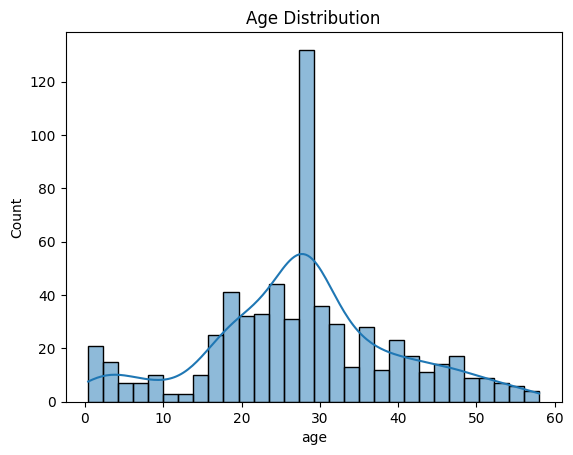

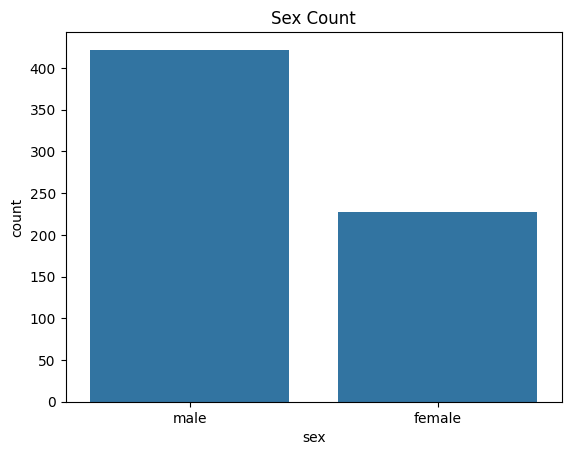

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
 # Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel('age')
plt.show()

# Sex count
sns.countplot(x='sex', data=df)
plt.title("Sex Count")
plt.show()

# Bivariate Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

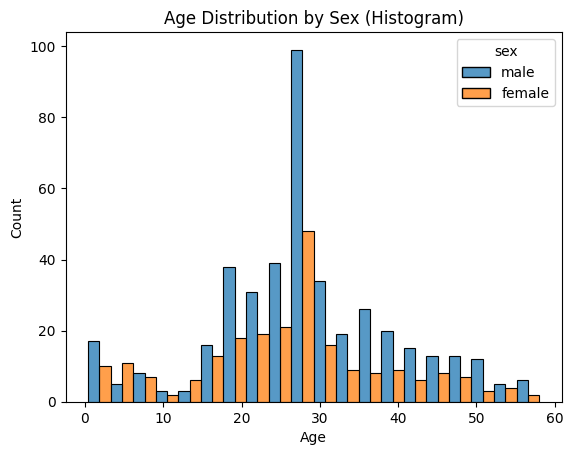

In [8]:
sns.histplot(data=df, x='age', hue='sex',multiple='dodge')
plt.title('Age Distribution by Sex (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

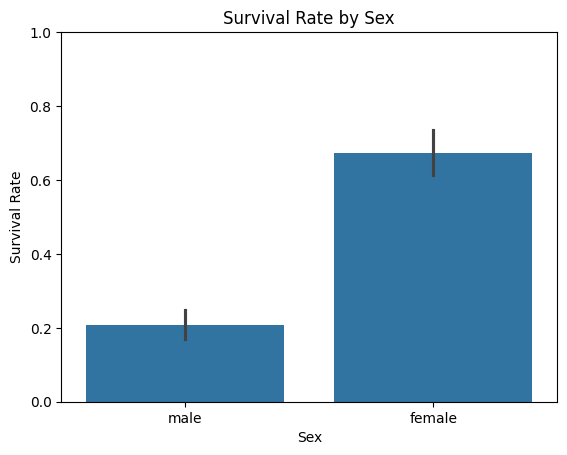

In [9]:
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()

# Multivariate Analysis

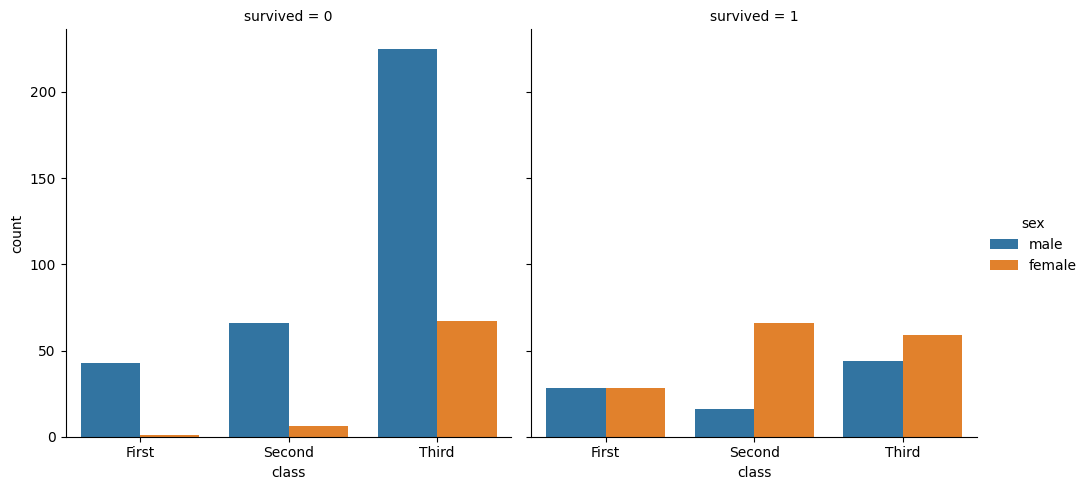

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df, x='class', hue='sex', col='survived', kind='count')
plt.show()


# Data Visualization

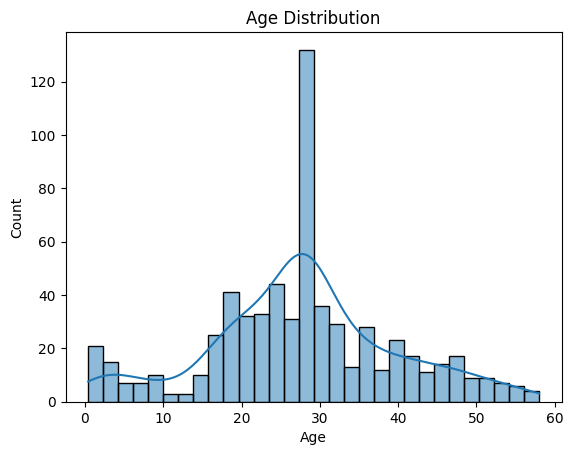

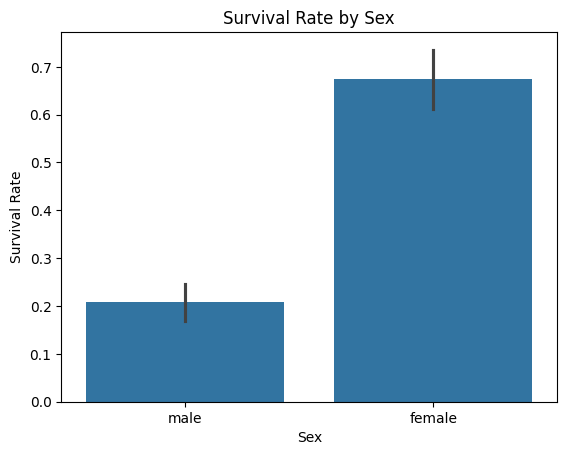

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Bar plot: Survival by Sex
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()


# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Scaling numerical columns
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])


# Rechecking

In [30]:
# Checking missing values
print("=== Missing Values ===")
print(df.isnull().sum())
print()

=== Missing Values ===
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64



In [31]:
# Checking duplicates
print("=== Duplicate Rows ===")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print()

=== Duplicate Rows ===
Number of duplicate rows: 0



In [32]:
# Checking data types
print("=== Data Types ===")
print(df.dtypes)
print()

=== Data Types ===
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object



In [33]:
# Checking for numerical columns
print("=== Numerical Summary Statistics ===")
print(df.describe())
print()

=== Numerical Summary Statistics ===
         survived      pclass           age       sibsp       parch  \
count  649.000000  649.000000  6.490000e+02  649.000000  649.000000   
mean     0.371341    2.454545 -5.474135e-18    0.523883    0.403698   
std      0.483536    0.746297  1.000771e+00    1.036286    0.846408   
min      0.000000    1.000000 -2.274393e+00    0.000000    0.000000   
25%      0.000000    2.000000 -5.578859e-01    0.000000    0.000000   
50%      0.000000    3.000000  2.596014e-02    0.000000    0.000000   
75%      1.000000    3.000000  5.263996e-01    1.000000    0.000000   
max      1.000000    3.000000  2.528157e+00    8.000000    6.000000   

               fare  
count  6.490000e+02  
mean   2.737068e-18  
std    1.000771e+00  
min   -1.331734e+00  
25%   -7.826988e-01  
50%   -4.277776e-01  
75%    4.935628e-01  
max    3.504434e+00  



In [34]:
# Check for unique values
categorical_cols = df.select_dtypes(include=['object']).columns
print("=== Unique Values in Categorical Columns ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

=== Unique Values in Categorical Columns ===

Column: sex
sex
male      422
female    227
Name: count, dtype: int64

Column: embarked
embarked
S    493
C    102
Q     54
Name: count, dtype: int64

Column: who
who
man      385
woman    188
child     76
Name: count, dtype: int64

Column: embark_town
embark_town
Southampton    493
Cherbourg      102
Queenstown      54
Name: count, dtype: int64

Column: alive
alive
no     408
yes    241
Name: count, dtype: int64


In [35]:
print(df.head())

   survived  pclass     sex       age  sibsp  parch      fare embarked  class  \
0         0       3    male -0.474479      1      0 -0.827605        S  Third   
2         1       3  female -0.140853      0      0 -0.780668        S  Third   
3         1       1  female  0.609806      1      0  2.360581        S  First   
4         0       3    male  0.609806      0      0 -0.771976        S  Third   
5         0       3    male  0.025960      0      0 -0.743585        Q  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  
5    man        True   Queenstown    no   True  
